# Tests on explainability

Fist part we are getting the keras model made by Shanekonaung on the Boston Housing dataset: https://www.kaggle.com/shanekonaung/boston-housing-price-dataset-with-keras

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()
labels = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']

Using TensorFlow backend.


In [3]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

In [4]:
from keras import models
from keras import layers

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))

    model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['mae'])
    return model

In [5]:
model = build_model()
model.fit(train_data, train_targets, epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

102/102 [==============================] - 0s 752us/step


In [29]:
test_mae_score

2.769066095352173

## Beginning of Experiments

#### We begin by experimenting on a signe individual

In [30]:
#We define what will be the epsilon used to calculate the derivative
epsilon = 0.01

In [31]:
#prediction of individual 0
base_pred = model.predict(np.array([test_data[0,:]]))

In [32]:
#For each feature we add epsilon and predict the result (in new_preds_pos)
new_preds = []
for i, feat in enumerate(np.array(test_data[0,:])):
    tmp = np.copy(test_data[0,:])
    np.put(tmp, i, feat+epsilon)
    new_preds.append(model.predict(np.array([tmp])))

In [33]:
#We can now calculate the derivatives based on normalized features
derivatives = (new_preds-base_pred)/epsilon

In [34]:
#Let's visualize them :
for i, der in enumerate(derivatives):
    print(f'derivative of the feature {i} on individual zero is {np.around(der[:,0],decimals=2)} ')

derivative of the feature 0 on individual zero is [-1.36] 
derivative of the feature 1 on individual zero is [-2.03] 
derivative of the feature 2 on individual zero is [0.37] 
derivative of the feature 3 on individual zero is [-0.4] 
derivative of the feature 4 on individual zero is [-2.32] 
derivative of the feature 5 on individual zero is [-0.68] 
derivative of the feature 6 on individual zero is [1.19] 
derivative of the feature 7 on individual zero is [-2.6] 
derivative of the feature 8 on individual zero is [2.3] 
derivative of the feature 9 on individual zero is [1.] 
derivative of the feature 10 on individual zero is [0.75] 
derivative of the feature 11 on individual zero is [-0.07] 
derivative of the feature 12 on individual zero is [-1.24] 


We can change the individual which is studied :

In [35]:
indiv = 1

In [36]:
#We define what will be the epsilon used to calculate the derivative
epsilon = 0.01

In [37]:
#prediction of individual 'indiv'
base_pred = model.predict(np.array([test_data[indiv,:]]))

In [38]:
#For each feature we add epsilon and predict the result
new_preds = []
for i, feat in enumerate(np.array(test_data[indiv,:])):
    tmp = np.copy(test_data[indiv,:])
    np.put(tmp, i, feat+epsilon)
    new_preds.append(model.predict(np.array([tmp])))

In [39]:
#We cannow calculate the derivatives
derivatives = (new_preds-base_pred)/epsilon
new_preds-base_pred

array([[[-0.06331825]],

       [[-0.05688095]],

       [[-0.00661469]],

       [[-0.04421234]],

       [[-0.03766251]],

       [[ 0.00166512]],

       [[-0.00072098]],

       [[-0.04926872]],

       [[ 0.01219177]],

       [[-0.01277542]],

       [[-0.01061249]],

       [[ 0.01720047]],

       [[-0.01837921]]], dtype=float32)

In [40]:
#Let's visualize them :
for i, der in enumerate(derivatives):
    print(f'derivative of the feature {i} on individual {indiv} is  {np.around(der[:,0],decimals=2)} ')

derivative of the feature 0 on individual 1 is  [-6.33] 
derivative of the feature 1 on individual 1 is  [-5.69] 
derivative of the feature 2 on individual 1 is  [-0.66] 
derivative of the feature 3 on individual 1 is  [-4.42] 
derivative of the feature 4 on individual 1 is  [-3.77] 
derivative of the feature 5 on individual 1 is  [0.17] 
derivative of the feature 6 on individual 1 is  [-0.07] 
derivative of the feature 7 on individual 1 is  [-4.93] 
derivative of the feature 8 on individual 1 is  [1.22] 
derivative of the feature 9 on individual 1 is  [-1.28] 
derivative of the feature 10 on individual 1 is  [-1.06] 
derivative of the feature 11 on individual 1 is  [1.72] 
derivative of the feature 12 on individual 1 is  [-1.84] 


### We will compute the derivative by retracting epsilon instead of adding it, in order to have a better approximation of the derivative

In [6]:
indiv = 1
epsilon = 0.01

base_pred = model.predict(np.array([test_data[indiv,:]]))

new_preds_pos = []
new_preds_neg = []
for i, feat in enumerate(np.array(test_data[indiv,:])):
    tmp = np.copy(test_data[indiv,:])
    np.put(tmp, i, feat+epsilon)
    new_preds_pos.append(model.predict(np.array([tmp])))
    np.put(tmp, i, feat-epsilon)
    new_preds_neg.append(model.predict(np.array([tmp])))
    
new_preds_pos = np.array(new_preds_pos)
new_preds_neg = np.array(new_preds_neg)
    
derivatives = (((new_preds_pos-base_pred)-(new_preds_neg-base_pred))/2)/epsilon

for i, der in enumerate(derivatives):
    print(f'derivative of the feature {i} on individual {indiv} is  {np.around(der[:,0],decimals=2)} ')

[[[-0.07406044]]

 [[-0.04308128]]

 [[-0.01566887]]

 [[-0.02894402]]

 [[-0.03750992]]

 [[-0.00564194]]

 [[-0.00425911]]

 [[-0.04884148]]

 [[ 0.02828407]]

 [[-0.00485611]]

 [[-0.00839996]]

 [[ 0.02676201]]

 [[-0.02135468]]]
derivative of the feature 0 on individual 1 is  [-7.42] 
derivative of the feature 1 on individual 1 is  [-4.38] 
derivative of the feature 2 on individual 1 is  [-1.58] 
derivative of the feature 3 on individual 1 is  [-3.17] 
derivative of the feature 4 on individual 1 is  [-3.96] 
derivative of the feature 5 on individual 1 is  [-0.66] 
derivative of the feature 6 on individual 1 is  [-0.62] 
derivative of the feature 7 on individual 1 is  [-4.91] 
derivative of the feature 8 on individual 1 is  [2.67] 
derivative of the feature 9 on individual 1 is  [-0.5] 
derivative of the feature 10 on individual 1 is  [-0.93] 
derivative of the feature 11 on individual 1 is  [2.58] 
derivative of the feature 12 on individual 1 is  [-2.08] 


### Let's try to give a visual representation of an individual

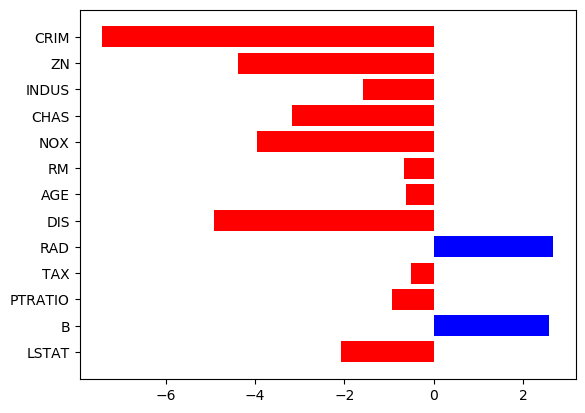

In [8]:
color = []
for i in derivatives[:,0][:,0]:
    if i > 0:
        color.append('blue')
    else:
        color.append('red')

plt.rcdefaults()
fig, ax = plt.subplots()
y_pos = np.arange(len(labels))
ax.barh(y_pos, derivatives[:,0][:,0], align='center',color=color)
ax.set_yticks(y_pos)
ax.set_yticklabels(labels)
ax.invert_yaxis()
plt.show()

We are intersted to see if training the same model with the same data leads to the same chart every time

102/102 [==============================] - 0s 1ms/step


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

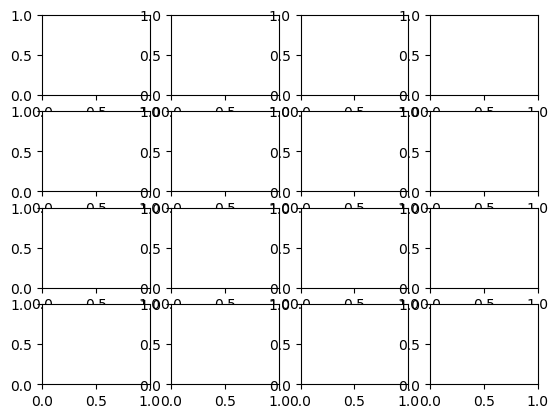

In [10]:
indiv = 1
epsilon = 0.01

fig, axs = plt.subplots(4, 4)

for i in range (4):
    for j in range (4):

        model = build_model()
        model.fit(train_data, train_targets, epochs=80, batch_size=16, verbose=0)
        test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

        base_pred = model.predict(np.array([test_data[indiv,:]]))

        new_preds_pos = []
        new_preds_neg = []
        for i, feat in enumerate(np.array(test_data[indiv,:])):
            tmp = np.copy(test_data[indiv,:])
            np.put(tmp, i, feat+epsilon)
            new_preds_pos.append(model.predict(np.array([tmp])))
            np.put(tmp, i, feat-epsilon)
            new_preds_neg.append(model.predict(np.array([tmp])))

        new_preds_pos = np.array(new_preds_pos)
        new_preds_neg = np.array(new_preds_neg)

        derivatives = (((new_preds_pos-base_pred)-(new_preds_neg-base_pred))/2)/epsilon

        color = []
        for i in derivatives[:,0][:,0]:
            if i > 0:
                color.append('blue')
            else:
                color.append('red')

        y_pos = np.arange(len(labels))
        axs[4*i+j].barh(y_pos, derivatives[:,0][:,0], align='center',color=color)
        axs[4*i+j].set_yticks(y_pos)
        axs[4*i+j].set_yticklabels(labels)
        axs[4*i+j].invert_yaxis()

plt.show()
